<a href="https://colab.research.google.com/github/Lanzero225/Python-Notebooks/blob/main/Philippine%20Weather/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Philippine Weather Analysis (2025)

The Philippines is a tropical country located in Southeast Asia, situated near the equator and along the western Pacific Ocean. Due to its geographic location, the country experiences highly variable weather conditions and is frequently affected by tropical storms and typhoons.

This analysis aims to examine historical weather data from the past two years across different locations in the Philippines. By analyzing key weather variables such as temperature, weather conditions, and other attributes, this study seeks to identify patterns, seasonal trends, and extreme weather occurrences. The insights derived from this analysis may help in understanding the country’s weather behavior and its implications for disaster preparedness, urban planning, and climate-related decision-making.



# Data Importing

To begin first, I will import the necessary libraries to begin this analysis.

In [86]:
import pandas as pd
import numpy as np

The dataset used for this analysis uses a dataset from Kaggle:
- https://www.kaggle.com/datasets/bwandowando/philippine-major-cities-weather-data-2025

The data here is gathered from:
- https://openweathermap.org

The 2025 dataset gathers records in 1-hour intervals.

First, let us begin by loading the dataset. I uploaded the dataset to my personal repository for easy access, which can be accessed with:
- "https://raw.githubusercontent.com/Lanzero225/Python-Notebooks/main/Philippine%20Weather/Data/{YYYY-MM}_CombinedData.csv"

After which, the csv file will be converted into a DataFrame and aggregated into a singular DataFrame.

In [87]:

directories = pd.period_range('2025-01', '2025-12', freq='M').strftime('%Y%m').tolist()
dfs = []

for i in directories:
    url = (
        "https://raw.githubusercontent.com/"
        "Lanzero225/Python-Notebooks/main/"
        f"Philippine%20Weather/Data/{i}_CombinedData.csv"
    )
    dfs.append(pd.read_csv(url))

weather_dataframe = pd.concat(dfs, ignore_index=True)

Looking initially into the code, we see that there are columns with missing values and mismatched datatypes.

Missing Columns:
- visibility
- wing.gust
- rain.1h

Datatype Mismatch:
- datetime
- sys.sunrise
- sys.sunset

In [88]:
weather_dataframe.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066627 entries, 0 to 1066626
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   visibility           1065372 non-null  float64
 1   datetime             1066627 non-null  object 
 2   main.temp            1066627 non-null  float64
 3   main.feels_like      1066627 non-null  float64
 4   main.temp_min        1066627 non-null  float64
 5   main.temp_max        1066627 non-null  float64
 6   main.pressure        1066627 non-null  float64
 7   main.humidity        1066627 non-null  float64
 8   main.sea_level       1066627 non-null  float64
 9   main.grnd_level      1066627 non-null  float64
 10  wind.speed           1066627 non-null  float64
 11  wind.deg             1066627 non-null  float64
 12  wind.gust            900218 non-null   float64
 13  clouds.all           1066627 non-null  float64
 14  sys.sunrise          1066627 non-null  object 
 15

In [89]:
weather_dataframe.head()

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
0,10000.0,2025-01-01 00:06:01+08:00,26.33,26.33,26.33,26.33,1011.0,80.0,1011.0,1005.0,3.48,131.0,5.79,85.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,overcast clouds,Alaminos,NaN
1,10000.0,2025-01-01 00:06:02+08:00,26.25,26.25,26.25,26.25,1012.0,83.0,1012.0,994.0,1.03,200.0,NaN,40.0,2025-01-01 06:23:37+08:00,2025-01-01 17:38:18+08:00,Clouds,scattered clouds,Angeles City,NaN
2,10000.0,2025-01-01 00:06:03+08:00,23.26,24.04,23.26,23.26,1012.0,92.0,1012.0,972.0,2.83,78.0,4.06,74.0,2025-01-01 06:22:02+08:00,2025-01-01 17:35:01+08:00,Clouds,broken clouds,Antipolo,NaN
3,10000.0,2025-01-01 00:06:04+08:00,24.69,25.59,24.69,24.69,1010.0,91.0,1010.0,1001.0,3.07,29.0,5.69,100.0,2025-01-01 06:06:41+08:00,2025-01-01 17:31:50+08:00,Clouds,overcast clouds,Bacolod,NaN
4,10000.0,2025-01-01 00:04:30+08:00,27.21,31.11,26.13,28.03,1011.0,88.0,1011.0,1008.0,1.54,130.0,NaN,75.0,2025-01-01 06:20:59+08:00,2025-01-01 17:38:10+08:00,Clouds,broken clouds,Bacoor,NaN


## Data Definition

Let's dive deep into each of the columns in this dataset.

These are the columns that refer to location and time:
- datetime - Date and time of current tracked weather.
- coord.lon - Longitude coordinate of city.
- coord.lat - Latitude coordinate of city.
- city_name - Name of the city.
  - e.g Alaminos, 119.9811, 16.1561
- sys.sunrise - Date and time of a city's sunrise
- sys.sunset - Date and timeof a city's sunset
  - e.g 2023-11-06 05:58:51+08:00

The following describe the basic weather signal units:
- visibility - Measure of distance at which objects can be discerned (0 to 10 km).
- main.temp - Temperature in Celsius.
- main.feels_like - Human perception of temperature in Celsius.
- main.pressure/main.sea_level - Atmospheric pressure on the sea level, hPa.
= main.grnd_level - Atmospheric pressure on the ground level, hPa
- main.humidity - Percentage of humidity.
- main.temp_min - Minimum temperature at the moment.
- main.temp_max - Maximum temperature at the moment.
- wind.speed - Wind speed in meter/sec (m/s).
- wind.deg - Wind direction in meteorological degrees
- wind.gust - Wind gust in meter/sec (m/s).
- clouds.all - Percentage of cloudiness
- rain.1h - Pecipitation in milimmeter/hour (mm/h).

The following describe basic weather labels:
- weather.main - Refers to the category of weather for that record.
- weather.description - Refers to the subtype of weather under that record.

Lastly, the following refer to the system data that is used while extracting data:
- sys.id - Internal parameter
- sys.type - Internal parameter
- extraction_date_time - Date and timestamp of when the system extracted the record.
- weather.id - Integer value referring to the ID corresponding to the specific weather description.
  - 201 -> thunderstorm with rain
- weather.icon - Corresponding icon associated with weather.description.

In [90]:
categorical_weather_labels = ['weather.main','weather.description']
time_location_labels = ['datetime','sys.sunrise','sys.sunset','coord.lat','coord.lon','city_name']
weather_signal_labels = [
    'main.temp','main.feels_like','main.temp_min','main.temp_max',
    'main.pressure','main.humidity','main.sea_level','main.grnd_level',
    'wind.speed','wind.deg','wind.gust','clouds.all','visibility','rain.1h'
]

# Data Preparation

Now that we've defined the columns found inside the dataset, we can begin the next stage of the analysis, data preparation.

## Data Normalization

As stated prior, the following columns are of object type and not datetime type. To fix this first, let us change their datatype

In [91]:
time_labels = ['datetime', 'sys.sunrise', 'sys.sunset']
for col in time_labels:
    if col in weather_dataframe.columns:
        weather_dataframe[col] = pd.to_datetime(weather_dataframe[col], errors='coerce')


## Filling in Missing Values

With column removal done, we can look into filling in null values, which include the following:
- visibility
- wind.gust
- rain.1h

Let us first begin with filling in visibility and wind gust. A custom interpolation function was implemented that operates on a per-city basis. The dataset is first sorted by city_name and datetime to preserve the correct temporal sequence of observations.

For each column, the data is grouped by city. To ensure temporal sequence of data and linearity, I applied linear interpolation. This estimates missing values based on surrounding timestamps. Say we have two non-null datapoints, A and B, with any number of null values in between. Linear interpolation draws a line between those two, line AB, and plots the null values in between, filling the null values.

In [92]:
def interpolate_columns_by_city(df, columns, method='linear'):
    df = df.sort_values(['city_name', 'datetime'])
    for col in columns:
        df[col] = (
            df.groupby('city_name')[col]
              .transform(lambda s: s.interpolate(method=method, limit_direction='both'))
        )
    return df

weather_dataframe = interpolate_columns_by_city(
    weather_dataframe,
    ['wind.gust', 'visibility']
)

Next, rain.1h indicates the precipitation experienced for that specific hour. If there is rain, it records the precipitation value in mm/h, otherwise, it doesn't record anything, or NaN. To circumvent this, let us populate all null values with 0.

In [93]:
weather_dataframe = weather_dataframe.fillna(0)
weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066627 entries, 0 to 1066626
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   visibility           1066627 non-null  float64                  
 1   datetime             1066627 non-null  datetime64[ns, UTC+08:00]
 2   main.temp            1066627 non-null  float64                  
 3   main.feels_like      1066627 non-null  float64                  
 4   main.temp_min        1066627 non-null  float64                  
 5   main.temp_max        1066627 non-null  float64                  
 6   main.pressure        1066627 non-null  float64                  
 7   main.humidity        1066627 non-null  float64                  
 8   main.sea_level       1066627 non-null  float64                  
 9   main.grnd_level      1066627 non-null  float64                  
 10  wind.speed           1066627 non-null  float64 

Now that we've completed imputation and normalization, let us analyze each column to look for outliers

## Outlier Detection

### Domain Outliers

In [96]:
df = weather_dataframe.copy()
invalid_bounds = (
    (df['main.humidity'] < 0) | (df['main.humidity'] > 100) |
    (df['clouds.all'] < 0) | (df['clouds.all'] > 100) |
    (df['wind.deg'] < 0) | (df['wind.deg'] > 360) |
    (df['rain.1h'] < 0) |
    (df['visibility'] < 0)
)

df[invalid_bounds]

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h


In [102]:
temp_outliers = (
    (df['main.temp'] < 285) | (df['main.temp'] > 315)
)
pressure_outliers = (
    (df['main.pressure'] < 870) | (df['main.pressure'] > 1080)
)

wind_outliers = (
    (df['wind.speed'] > 70) |
    (df['wind.gust'] > 90)
)
rain_outliers = df['rain.1h'] > 120

df[rain_outliers]

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h


### Statistical Outlier

In [106]:
df['temp_jump'] = (
    df.groupby('city_name')['main.temp']
      .diff()
      .abs()
)

suspicious_jumps = df['temp_jump'] > 5  # Kelvin/hour
suspicious_jumps

np.int64(910)

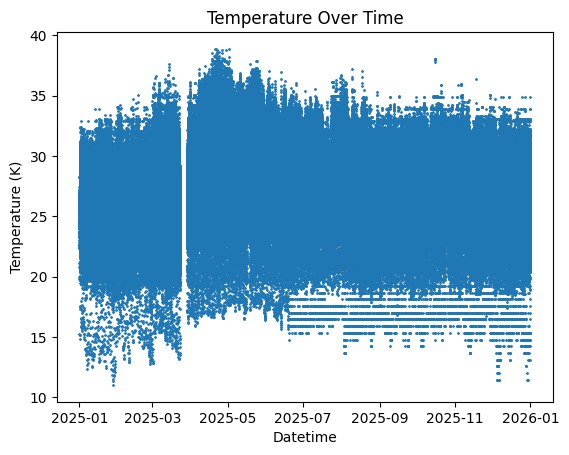

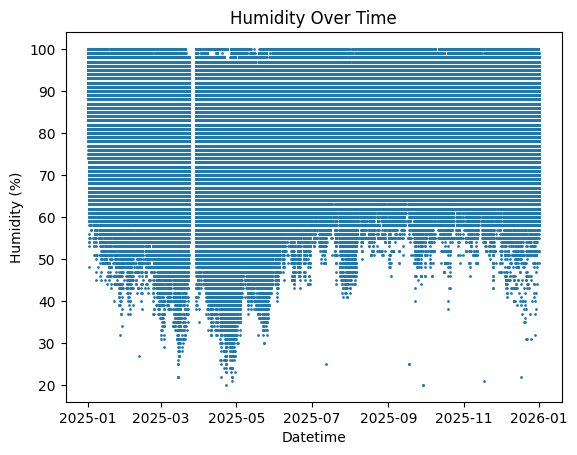

In [108]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(weather_dataframe['datetime'], weather_dataframe['main.temp'], s=1)
plt.xlabel('Datetime')
plt.ylabel('Temperature (K)')
plt.title('Temperature Over Time')
plt.show()

plt.figure()
plt.scatter(weather_dataframe['datetime'], weather_dataframe['main.humidity'], s=1)
plt.xlabel('Datetime')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.show()

## Removing Irrelevant Features/Columns

Redundant/Irrelevant columns will only serve to add extra unecessary memory when working with the dataset, and won't be of any use.

In [94]:
weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066627 entries, 0 to 1066626
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   visibility           1066627 non-null  float64                  
 1   datetime             1066627 non-null  datetime64[ns, UTC+08:00]
 2   main.temp            1066627 non-null  float64                  
 3   main.feels_like      1066627 non-null  float64                  
 4   main.temp_min        1066627 non-null  float64                  
 5   main.temp_max        1066627 non-null  float64                  
 6   main.pressure        1066627 non-null  float64                  
 7   main.humidity        1066627 non-null  float64                  
 8   main.sea_level       1066627 non-null  float64                  
 9   main.grnd_level      1066627 non-null  float64                  
 10  wind.speed           1066627 non-null  float64 